In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
#Warning messages are typically issued in situations where 
#it is useful to alert the user of some condition in a program, 
#where that condition (normally) doesn’t warrant raising an exception and terminating the program.
import warnings
#The warnings filter controls whether warnings are ignored, displayed, or turned into errors
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r'train.csv')

# ستونهای دیتاست

In [3]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# بررسی صفت هدف

In [4]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

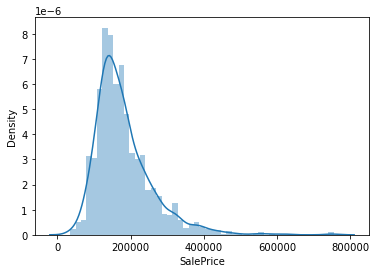

In [5]:
sns.distplot(df['SalePrice'])

In [6]:
df['SalePrice'].skew()

1.8828757597682129

In [7]:
df['SalePrice'].kurt()

6.536281860064529

# یافتن وابستگی ها

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

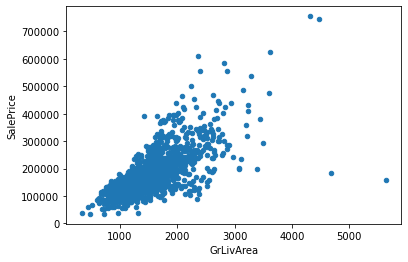

In [13]:
df.plot.scatter(x='GrLivArea',y='SalePrice')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

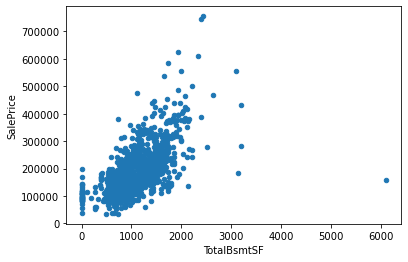

In [14]:
df.plot.scatter(x='TotalBsmtSF',y='SalePrice')

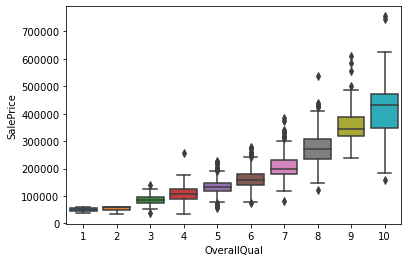

In [15]:
fig = sns.boxplot(x='OverallQual',y='SalePrice',data=df)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

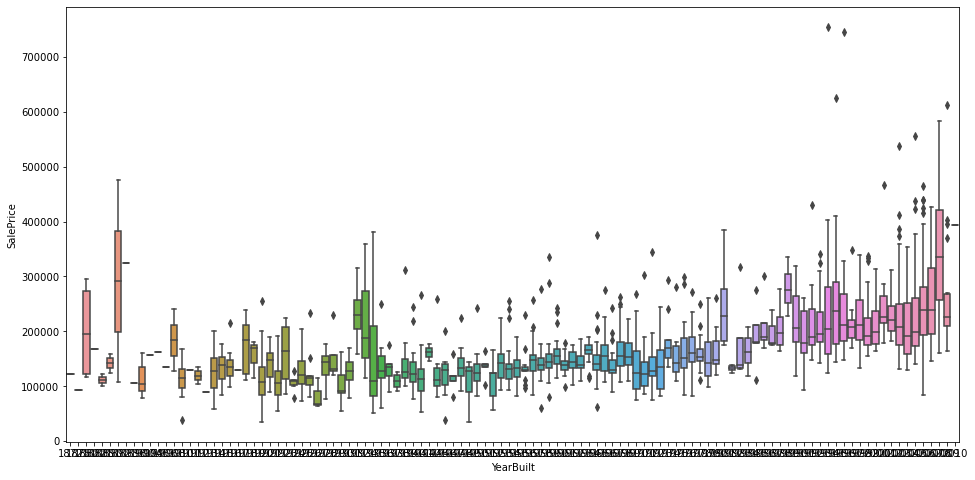

In [19]:
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x='YearBuilt',y='SalePrice',data=df)

In [21]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot:>

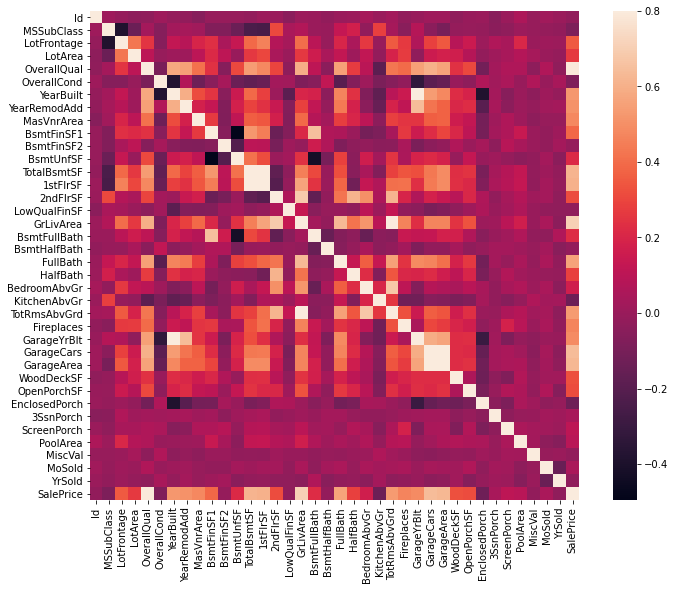

In [28]:
plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr(),vmax=0.8,square=True,xticklabels=True,yticklabels=True)

In [32]:
df.corr().nlargest(10,'SalePrice')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


In [34]:
df.corr().nlargest(10,'SalePrice')['SalePrice']

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

<AxesSubplot:>

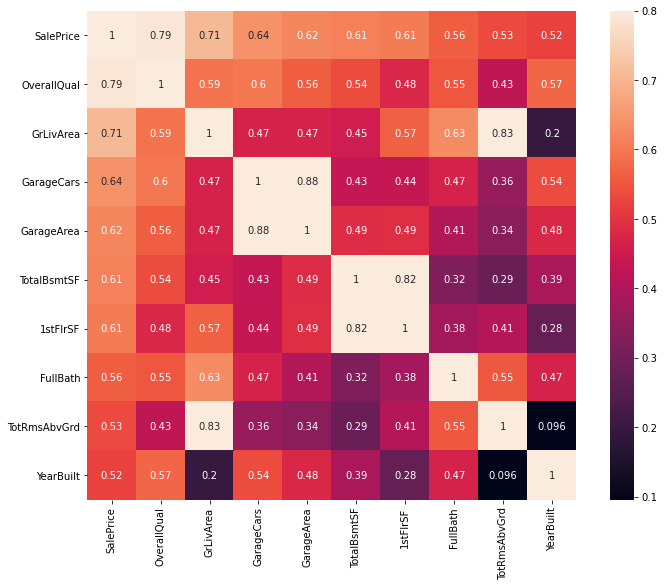

In [15]:
col = df.corr().nlargest(10,'SalePrice')['SalePrice'].index
plt.subplots(figsize=(12, 9))
sns.heatmap(np.corrcoef(df[col].values.T),vmax=0.8,square=True,xticklabels=col,yticklabels=col,annot=True)

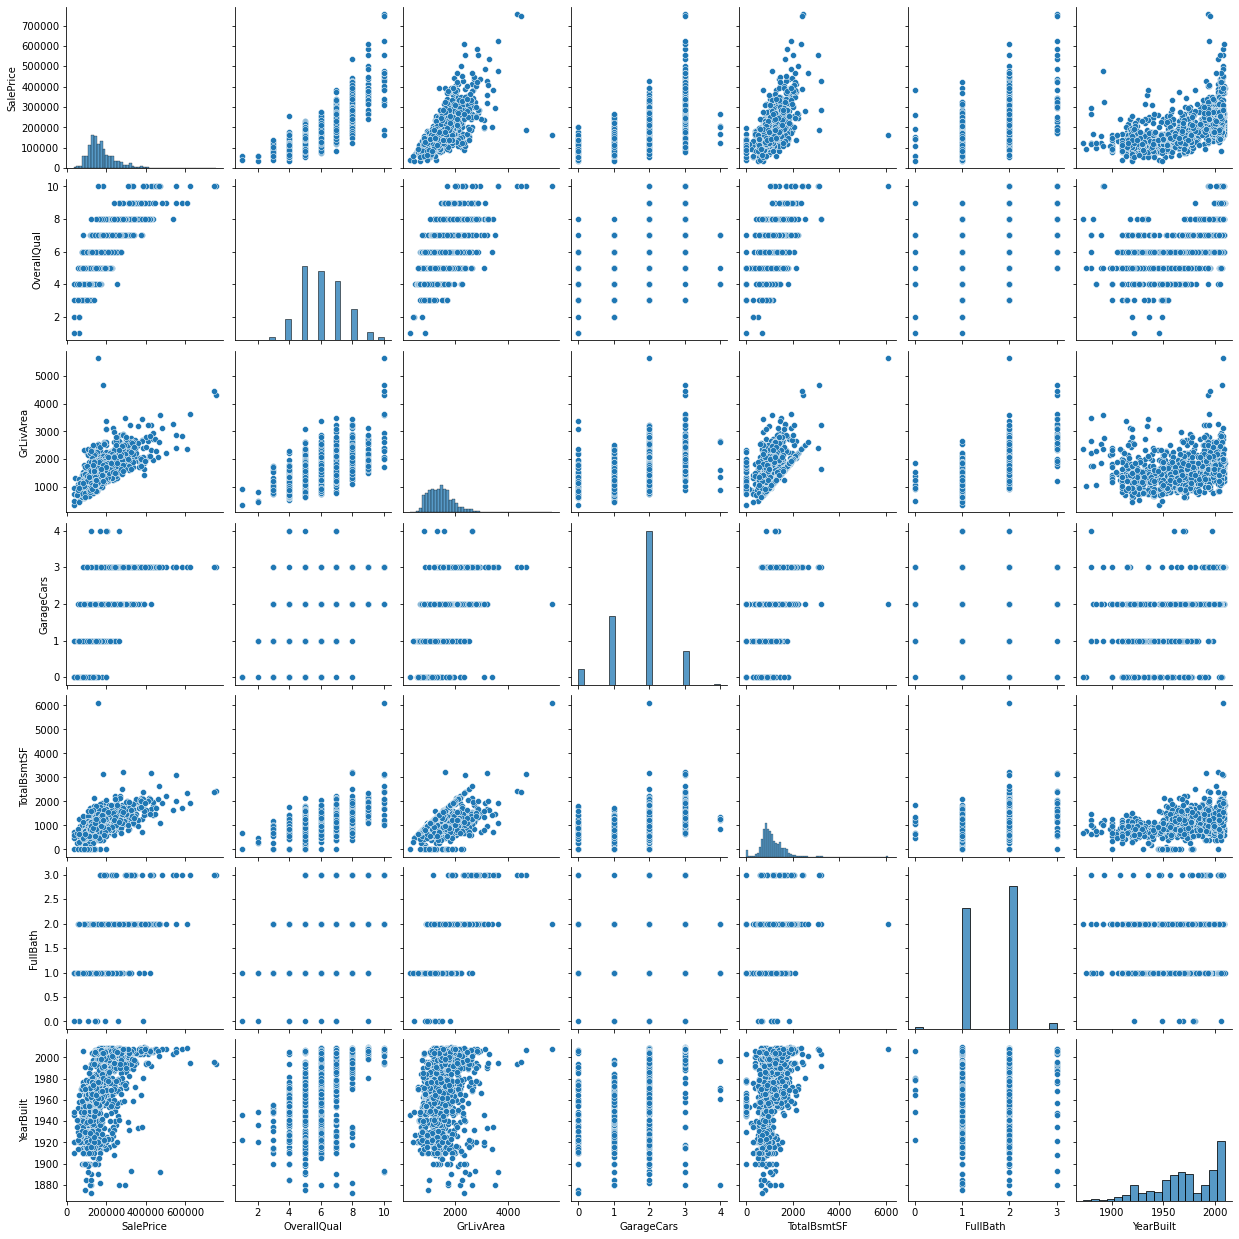

In [18]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols],size=2.5)

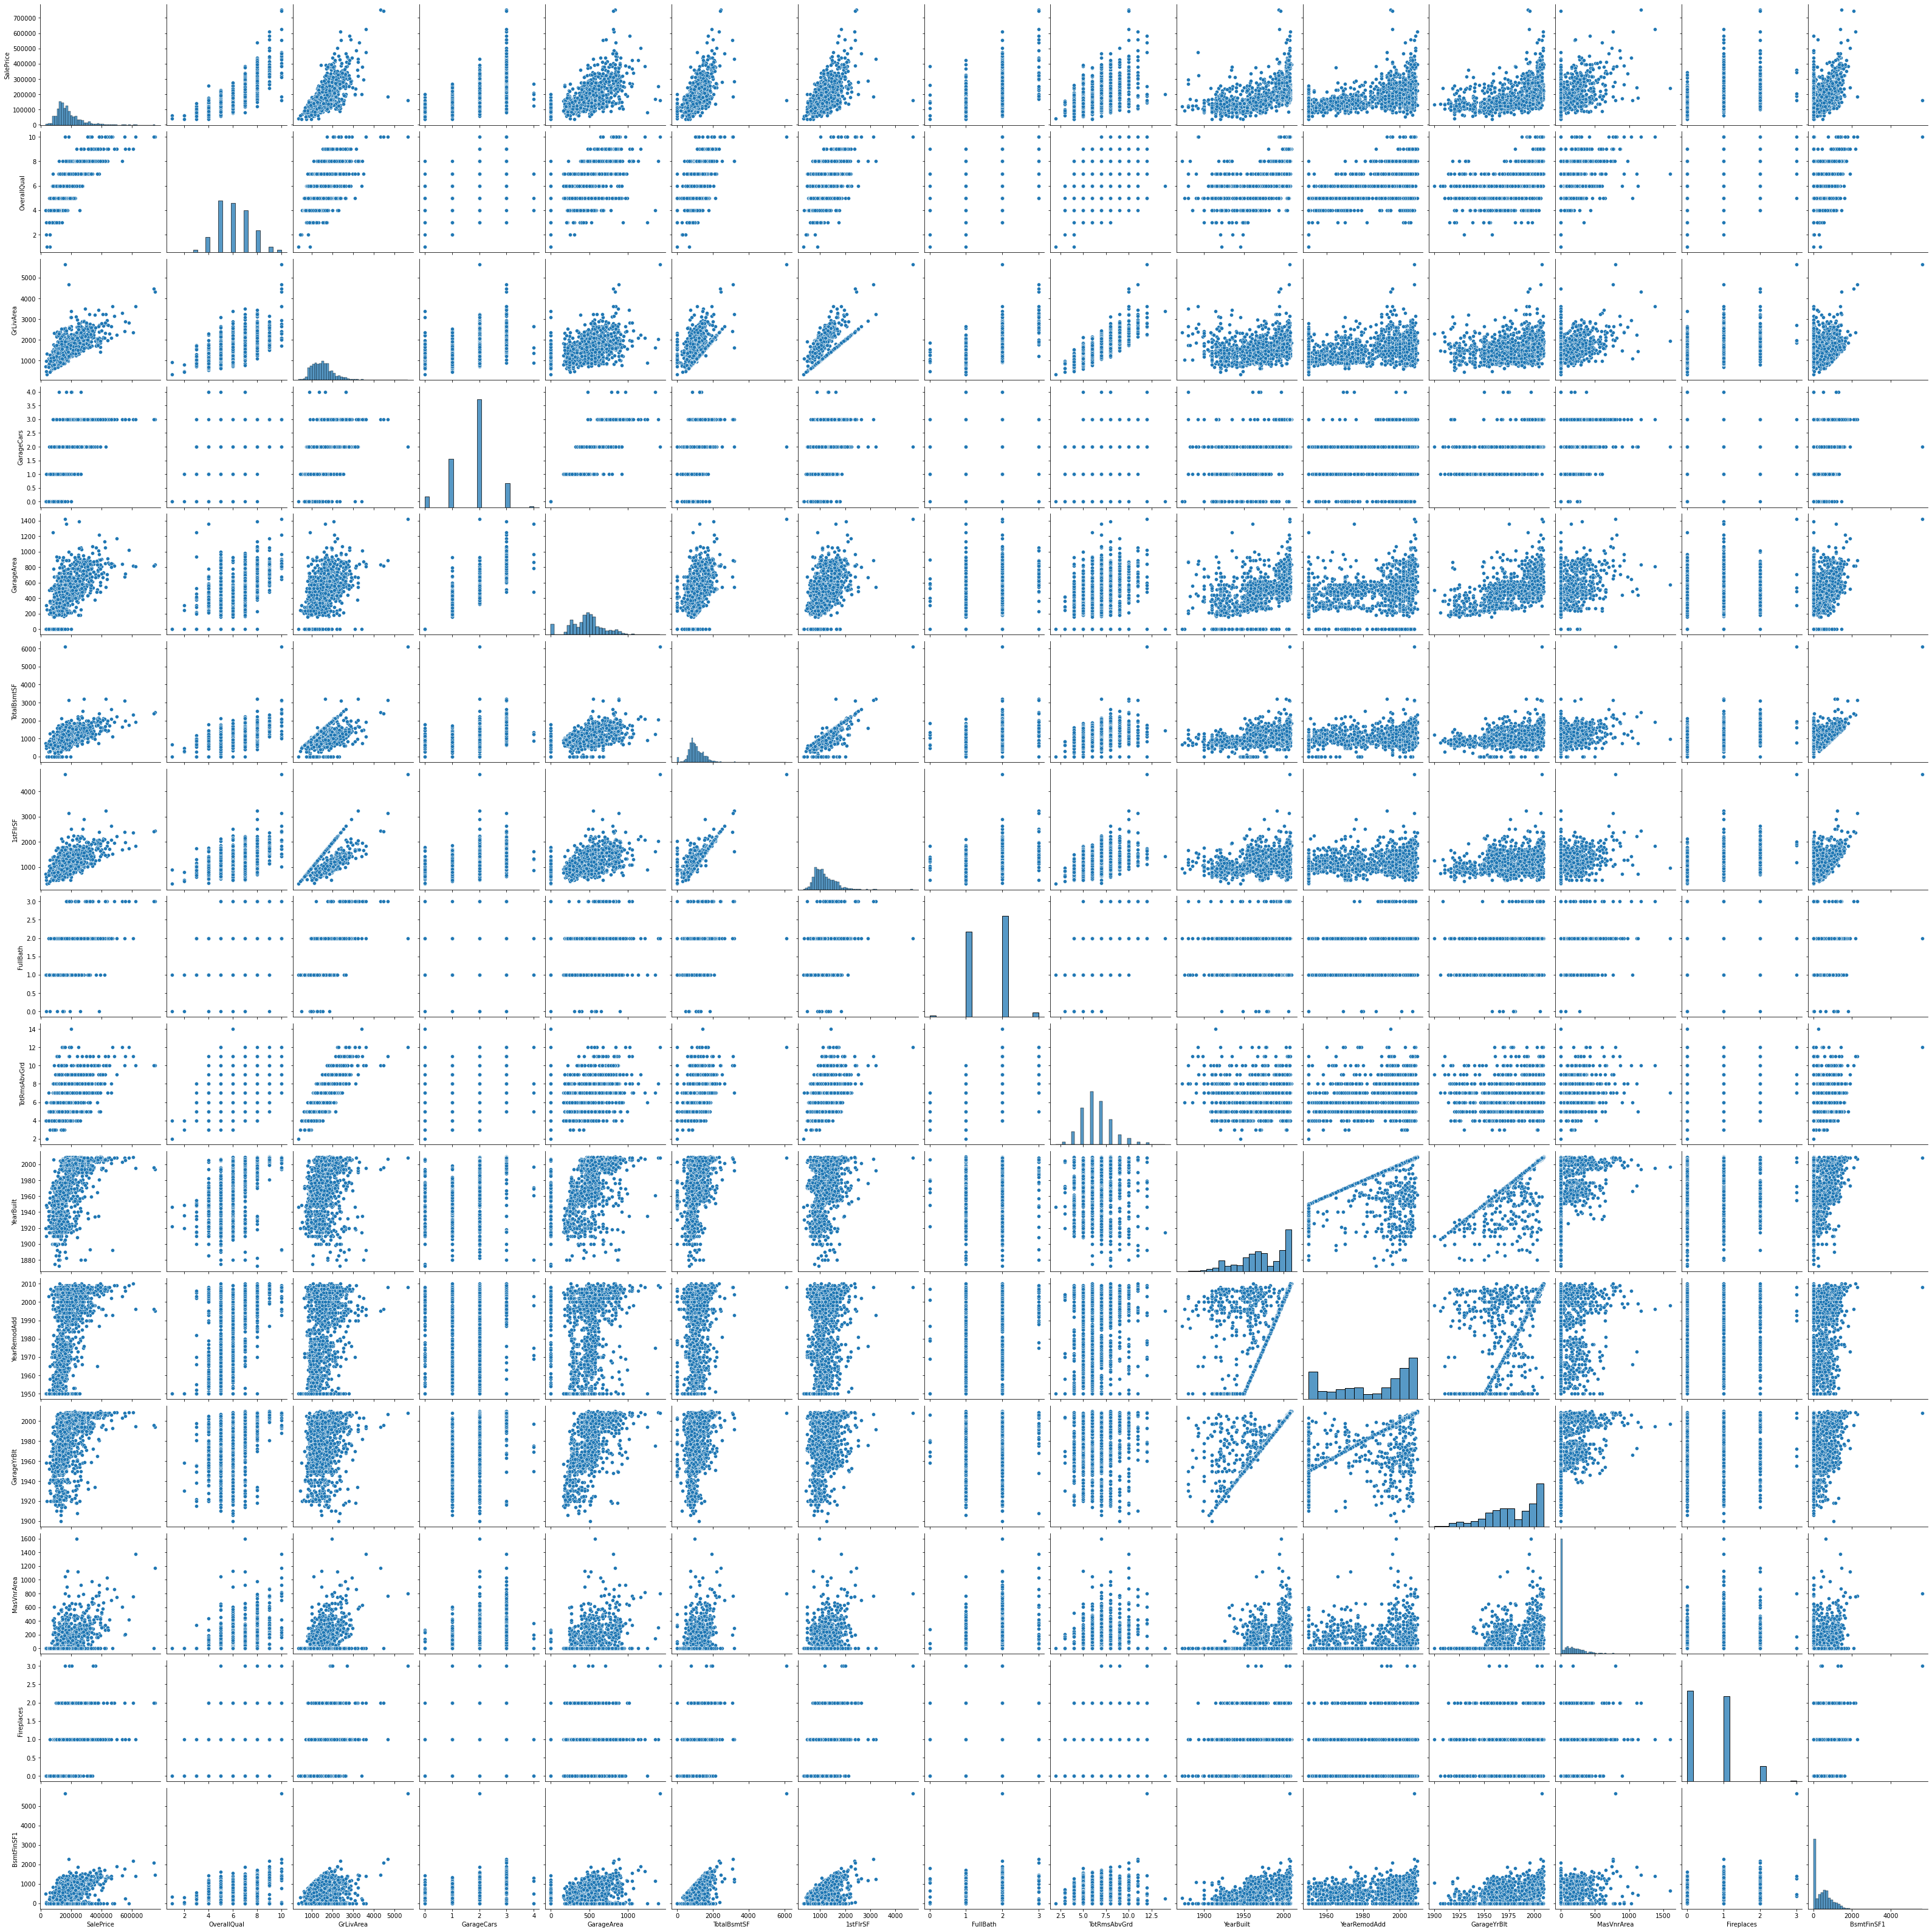

In [24]:
cols = df.corr().nlargest(15,'SalePrice').index
sns.pairplot(df[cols],size=3)

# missing Value

In [28]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data.head(20)

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


ملاحظه می کنید که 5 سطر اول درصد بسیار زیادی از داده ها دارای مقدار گم شده هستند. می توان این ستون ها  را حذف کرد

In [34]:
df.drop(missing_data[missing_data['percent']>0.15].index,axis=1,inplace=True)

In [35]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data.head(20)

,total,percent
GarageType,81,0.055479
GarageCond,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtCond,37,0.025342
BsmtQual,37,0.025342


گروه دوم صفات درصد بسیار پائینی از داده گم شده دارند. رویکرد اتخاذ شده در اینجا حذف این نمونه هاست.
هر چند که می توان آنها را imute کرد

In [39]:
df.dropna(axis=0,subset=missing_data[missing_data['total']>50].index,inplace=True)

In [40]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data.head(20)

,total,percent
BsmtFinType2,31,0.022480
BsmtExposure,31,0.022480
BsmtFinType1,30,0.021755
BsmtQual,30,0.021755
BsmtCond,30,0.021755
MasVnrType,8,0.005801
MasVnrArea,8,0.005801
Electrical,1,0.000725
HalfBath,0,0.000000
BedroomAbvGr,0,0.000000


In [44]:
df.dropna(axis=0,subset=missing_data[missing_data['total']>=1].index,inplace=True)

In [46]:
df.isnull().sum().max()

0

# out liars

In [47]:
saleprice_scaled = StandardScaler().fit_transform(df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.91990905]
 [-1.8604676 ]
 [-1.65772778]
 [-1.62594708]
 [-1.6069319 ]
 [-1.6069319 ]
 [-1.57672312]
 [-1.54988636]
 [-1.52453279]
 [-1.5181944 ]]

outer range (high) of the distribution:
[[3.78070184]
 [3.99414088]
 [4.45257146]
 [4.66807681]
 [4.68811881]
 [5.02217745]
 [5.38630543]
 [5.55545178]
 [7.07666601]
 [7.20343387]]


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

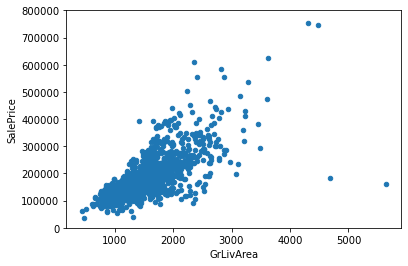

In [48]:
df.plot.scatter(x='GrLivArea',y='SalePrice',ylim=(0,800000))

In [64]:
outliar_id = df.sort_values('GrLivArea',ascending=False)['Id'][:2].index

In [65]:
outliar_id

Int64Index([1298, 523], dtype='int64')

In [66]:
df.drop(outliar_id,axis=0,inplace=True)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

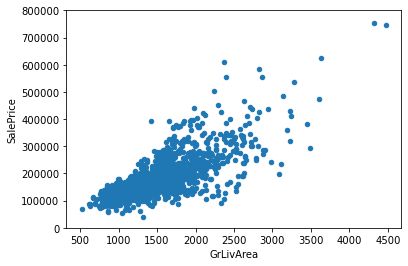

In [67]:
df.plot.scatter(x='GrLivArea',y='SalePrice',ylim=(0,800000))

In [68]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1334 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1334 non-null   int64  
 1   MSSubClass     1334 non-null   int64  
 2   MSZoning       1334 non-null   object 
 3   LotArea        1334 non-null   int64  
 4   Street         1334 non-null   object 
 5   LotShape       1334 non-null   object 
 6   LandContour    1334 non-null   object 
 7   Utilities      1334 non-null   object 
 8   LotConfig      1334 non-null   object 
 9   LandSlope      1334 non-null   object 
 10  Neighborhood   1334 non-null   object 
 11  Condition1     1334 non-null   object 
 12  Condition2     1334 non-null   object 
 13  BldgType       1334 non-null   object 
 14  HouseStyle     1334 non-null   object 
 15  OverallQual    1334 non-null   int64  
 16  OverallCond    1334 non-null   int64  
 17  YearBuilt      1334 non-null   int64  
 18  YearRemo

# normality

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

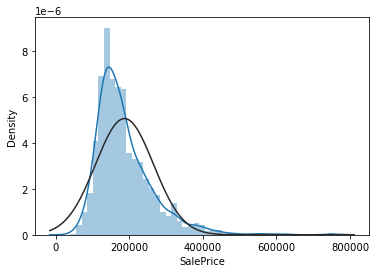

In [74]:
sns.distplot(df['SalePrice'],fit=norm)

((array([-3.27976626, -3.02071347, -2.8765379 , ...,  2.8765379 ,
          3.02071347,  3.27976626]),
  array([ 40000,  55993,  58500, ..., 625000, 745000, 755000], dtype=int64)),
 (73149.26384042164, 186991.9070464768, 0.9261288015757537))

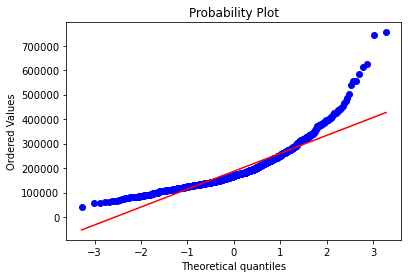

In [76]:
stats.probplot(df['SalePrice'],plot=plt)

SalePrice isn't normal

In [77]:
df['SalePrice'] = np.log(df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

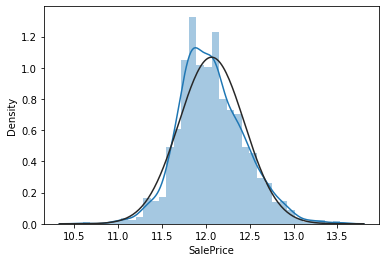

In [78]:
sns.distplot(df['SalePrice'],fit=norm)

((array([-3.27976626, -3.02071347, -2.8765379 , ...,  2.8765379 ,
          3.02071347,  3.27976626]),
  array([10.59663473, 10.93298196, 10.97678203, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.37212473851402444, 12.065493422516187, 0.9938959706625485))

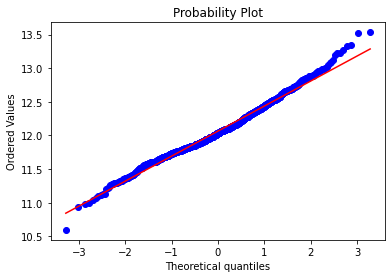

In [79]:
stats.probplot(df['SalePrice'],plot=plt)

now check GrLivArea

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

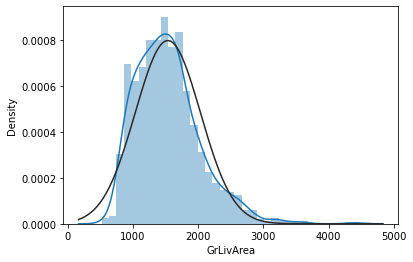

In [81]:
sns.distplot(df['GrLivArea'],fit=norm)

((array([-3.27976626, -3.02071347, -2.8765379 , ...,  2.8765379 ,
          3.02071347,  3.27976626]),
  array([ 520,  616,  630, ..., 3627, 4316, 4476], dtype=int64)),
 (486.9007650082288, 1533.772863568216, 0.9720083896880267))

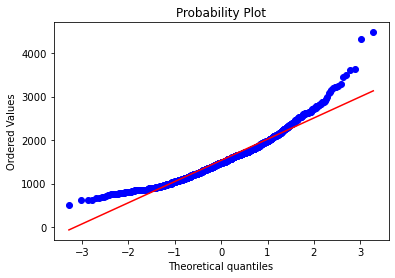

In [83]:
stats.probplot(df['GrLivArea'],plot=plt)

In [84]:
df['GrLivArea'] = np.log(df['GrLivArea'])

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

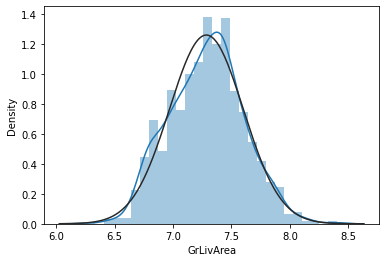

In [86]:
sns.distplot(df['GrLivArea'],fit=norm)

((array([-3.27976626, -3.02071347, -2.8765379 , ...,  2.8765379 ,
          3.02071347,  3.27976626]),
  array([6.25382881, 6.42324696, 6.44571982, ..., 8.19616114, 8.37008433,
         8.40648507])),
 (0.31621299519709245, 7.285323723078418, 0.9982693761116266))

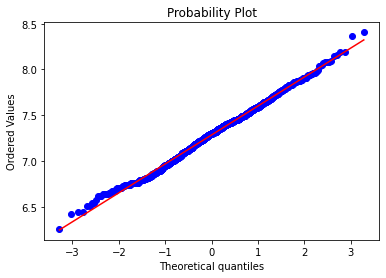

In [87]:
stats.probplot(df['GrLivArea'],plot=plt)

check TotalBsmtSF

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

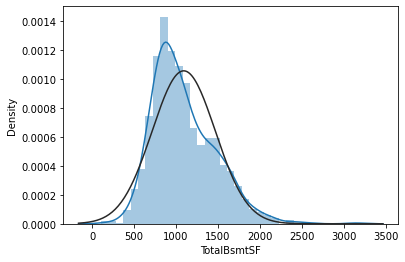

In [88]:
sns.distplot(df['TotalBsmtSF'],fit=norm)

((array([-3.27976626, -3.02071347, -2.8765379 , ...,  2.8765379 ,
          3.02071347,  3.27976626]),
  array([ 105,  190,  264, ..., 2633, 3094, 3200], dtype=int64)),
 (368.66390013783285, 1091.7241379310344, 0.9759362603010174))

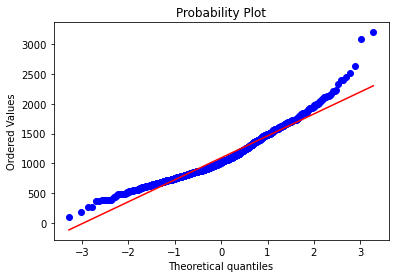

In [89]:
stats.probplot(df['TotalBsmtSF'],plot=plt)